In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import numpy as np
import random

from src.data.ETL import get_loaders
from src.data.make_dataset import ImageDataset
from src.models import UNet, AttentionUNet, TransformerUNet, TransformerUNetParallel
from src.utils.Metrics import Metrics
from src.utils.losses import DiceBCELoss
from src.utils.plot import plot_losses, plot_generic
from src.utils.config import DTYPE, get_device
from src.utils.config import ACCURACY, AUPRC, AUROC_, DICE_SCORE, F1_SCORE, JACCARD_INDEX, PRECISION, RECALL, SPECIFICITY

from src.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
device = get_device()
device, torch.cuda.device_count()

(device(type='cuda'), 2)

In [3]:
# train_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/TRAIN", "../data/raw/Br35H-Mask-RCNN/TRAIN_MASK")
# val_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/VAL", "../data/raw/Br35H-Mask-RCNN/VAL_MASK")

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

train_ratio = 0.65
val_ratio = 0.20
batch_size = 256
size = (128, 128)
num_workers = 2
is_raw = False

train_loader, val_loader, test_loader = get_loaders(f'../data/{"raw" if is_raw else "processed"}/lgg-mri-segmentation/kaggle_3m', train_ratio, val_ratio, batch_size, size, num_workers, is_raw)
print(f'Train samples: {len(train_loader.dataset)}')
print(f'Val samples: {len(val_loader.dataset)}')
print(f'Test samples: {len(test_loader.dataset)}')

test: 100%|██████████| 412/412 [00:00<00:00, 242806.41it/s]

Train samples: 892
Val samples: 275
Test samples: 206


Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.4723]


Training   - Accuracy: 0.9221 | Dice: 0.0956 | IoU: 0.4860 | Loss: 1.3640
Validation - Accuracy: 0.9703 | Dice: 0.0000 | IoU: 0.4851 | Loss: 1.4396

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9786, Dice=0.0012, IoU=0.4896, Loss=1.3267]

Training   - Accuracy: 0.9675 | Dice: 0.5261 | IoU: 0.6620 | Loss: 0.9953
Validation - Accuracy: 0.9705 | Dice: 0.0150 | IoU: 0.4890 | Loss: 1.3335

Epoch 3/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9786, Dice=0.0000, IoU=0.4893, Loss=1.3758]


Training   - Accuracy: 0.9783 | Dice: 0.6126 | IoU: 0.7097 | Loss: 0.7386
Validation - Accuracy: 0.9707 | Dice: 0.0266 | IoU: 0.4921 | Loss: 1.3596

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9790, Dice=0.0357, IoU=0.4986, Loss=1.1376]


Training   - Accuracy: 0.9808 | Dice: 0.6122 | IoU: 0.7108 | Loss: 0.6193
Validation - Accuracy: 0.9723 | Dice: 0.1358 | IoU: 0.5226 | Loss: 1.1146

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9805, Dice=0.1658, IoU=0.5354, Loss=0.9816]

Training   - Accuracy: 0.9815 | Dice: 0.6335 | IoU: 0.7224 | Loss: 0.5517
Validation - Accuracy: 0.9744 | Dice: 0.2547 | IoU: 0.5601 | Loss: 0.9465

Epoch 6/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9791, Dice=0.0489, IoU=0.5021, Loss=1.0101]


Training   - Accuracy: 0.9819 | Dice: 0.6126 | IoU: 0.7116 | Loss: 0.5345
Validation - Accuracy: 0.9735 | Dice: 0.2048 | IoU: 0.5438 | Loss: 0.9341

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9820, Dice=0.2878, IoU=0.5750, Loss=0.7926]

Training   - Accuracy: 0.9825 | Dice: 0.6302 | IoU: 0.7212 | Loss: 0.4996
Validation - Accuracy: 0.9777 | Dice: 0.4284 | IoU: 0.6251 | Loss: 0.7113

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9820, Dice=0.2860, IoU=0.5744, Loss=0.7649]

Training   - Accuracy: 0.9832 | Dice: 0.6480 | IoU: 0.7311 | Loss: 0.4749
Validation - Accuracy: 0.9781 | Dice: 0.4346 | IoU: 0.6278 | Loss: 0.6776

Epoch 9/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9825, Dice=0.3266, IoU=0.5888, Loss=0.6784]


Training   - Accuracy: 0.9834 | Dice: 0.6433 | IoU: 0.7287 | Loss: 0.4638
Validation - Accuracy: 0.9810 | Dice: 0.5578 | IoU: 0.6838 | Loss: 0.5577

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9822, Dice=0.2935, IoU=0.5771, Loss=0.7173]

Training   - Accuracy: 0.9837 | Dice: 0.6520 | IoU: 0.7336 | Loss: 0.4509
Validation - Accuracy: 0.9788 | Dice: 0.4578 | IoU: 0.6377 | Loss: 0.6177

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9827, Dice=0.3498, IoU=0.5973, Loss=0.6047]

Training   - Accuracy: 0.9836 | Dice: 0.6488 | IoU: 0.7317 | Loss: 0.4492
Validation - Accuracy: 0.9837 | Dice: 0.6711 | IoU: 0.7442 | Loss: 0.4532

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9828, Dice=0.3449, IoU=0.5955, Loss=0.6196]


Training   - Accuracy: 0.9841 | Dice: 0.6674 | IoU: 0.7423 | Loss: 0.4280
Validation - Accuracy: 0.9823 | Dice: 0.5970 | IoU: 0.7038 | Loss: 0.4858

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9827, Dice=0.3300, IoU=0.5901, Loss=0.5771]

Training   - Accuracy: 0.9844 | Dice: 0.6720 | IoU: 0.7451 | Loss: 0.4163
Validation - Accuracy: 0.9849 | Dice: 0.6846 | IoU: 0.7525 | Loss: 0.4088

Epoch 14/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9820, Dice=0.2812, IoU=0.5728, Loss=0.6504]

Training   - Accuracy: 0.9849 | Dice: 0.6949 | IoU: 0.7585 | Loss: 0.3965
Validation - Accuracy: 0.9812 | Dice: 0.5467 | IoU: 0.6786 | Loss: 0.5100

Epoch 15/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9829, Dice=0.3512, IoU=0.5979, Loss=0.5418]

Training   - Accuracy: 0.9847 | Dice: 0.6803 | IoU: 0.7500 | Loss: 0.3979
Validation - Accuracy: 0.9863 | Dice: 0.7345 | IoU: 0.7832 | Loss: 0.3677

Epoch 16/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9821, Dice=0.2871, IoU=0.5748, Loss=0.5416]


Training   - Accuracy: 0.9852 | Dice: 0.6953 | IoU: 0.7589 | Loss: 0.3799
Validation - Accuracy: 0.9851 | Dice: 0.6868 | IoU: 0.7539 | Loss: 0.3845

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.84s/it, Acc=0.9828, Dice=0.3365, IoU=0.5925, Loss=0.4839]

Training   - Accuracy: 0.9860 | Dice: 0.7165 | IoU: 0.7720 | Loss: 0.3547
Validation - Accuracy: 0.9865 | Dice: 0.7374 | IoU: 0.7852 | Loss: 0.3456

Epoch 18/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.85s/it, Acc=0.9845, Dice=0.4440, IoU=0.6349, Loss=0.4268]


Training   - Accuracy: 0.9864 | Dice: 0.7258 | IoU: 0.7779 | Loss: 0.3446
Validation - Accuracy: 0.9870 | Dice: 0.7593 | IoU: 0.7994 | Loss: 0.3302

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.84s/it, Acc=0.9853, Dice=0.4822, IoU=0.6514, Loss=0.4158]


Training   - Accuracy: 0.9866 | Dice: 0.7307 | IoU: 0.7810 | Loss: 0.3319
Validation - Accuracy: 0.9871 | Dice: 0.7441 | IoU: 0.7896 | Loss: 0.3212

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9860, Dice=0.5223, IoU=0.6697, Loss=0.4002]


Training   - Accuracy: 0.9874 | Dice: 0.7524 | IoU: 0.7951 | Loss: 0.3095
Validation - Accuracy: 0.9878 | Dice: 0.7770 | IoU: 0.8114 | Loss: 0.3083



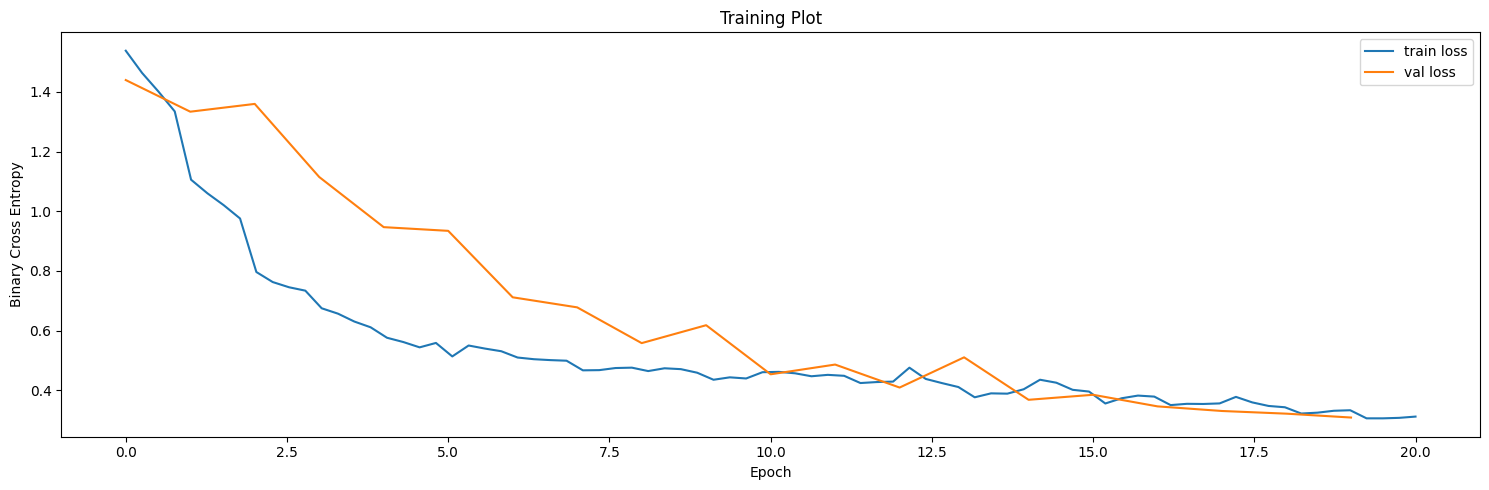

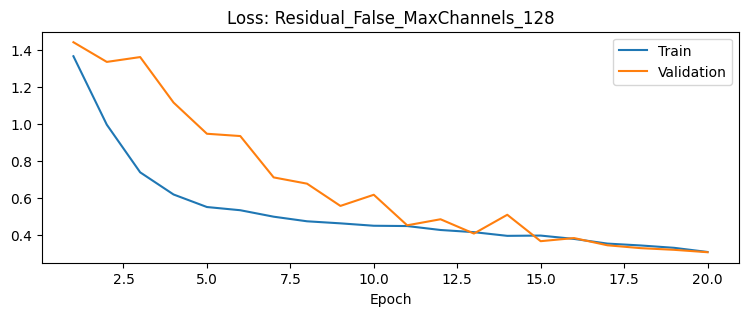

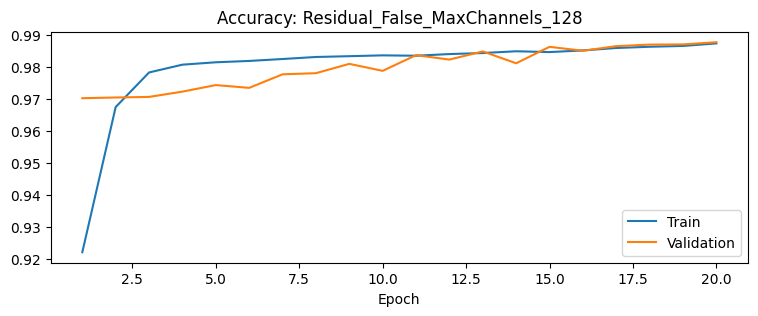

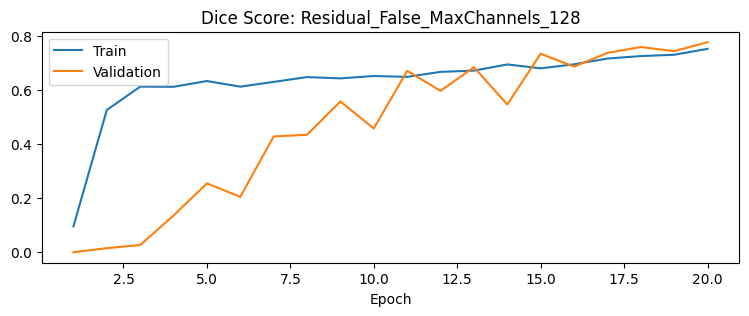

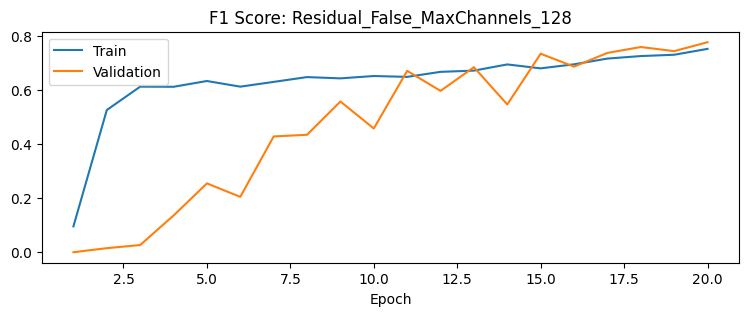

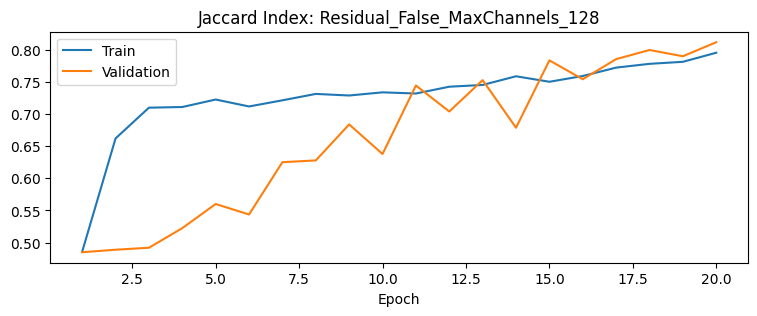

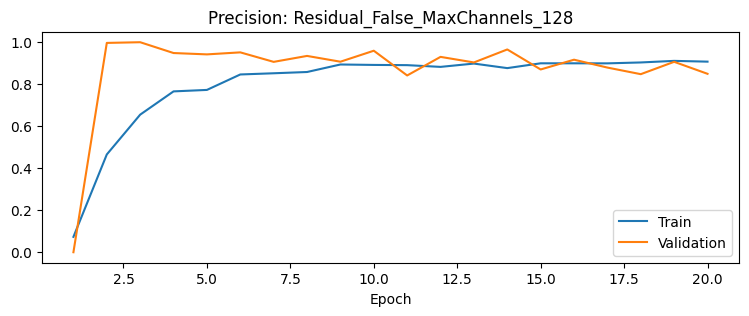

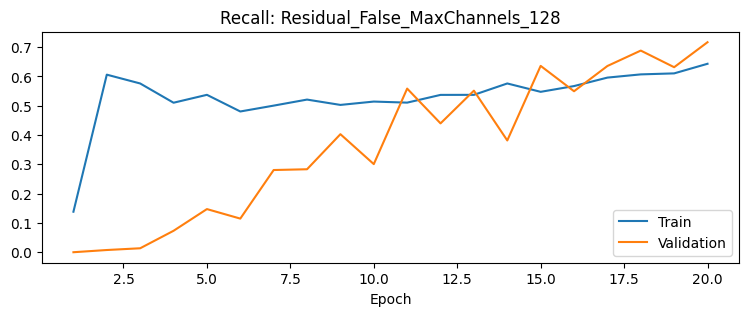

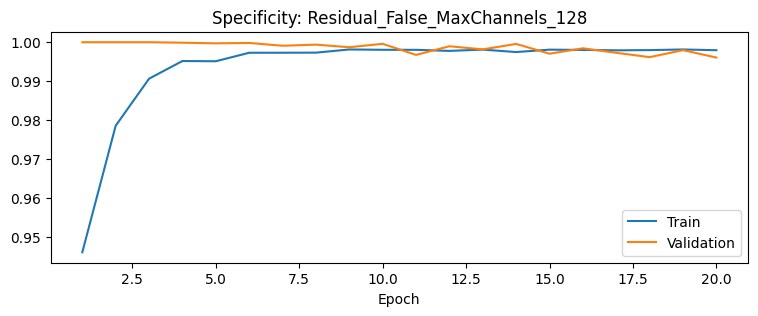

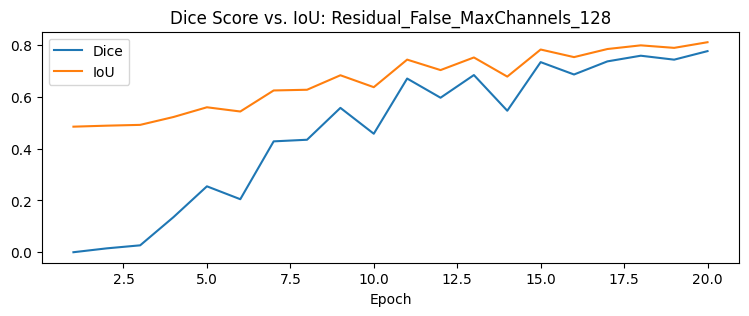

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.89s/it, Acc=0.6632, Dice=0.0798, IoU=0.3499, Loss=1.9873]


Training   - Accuracy: 0.5865 | Dice: 0.0968 | IoU: 0.3140 | Loss: 1.9370
Validation - Accuracy: 0.5758 | Dice: 0.0936 | IoU: 0.3077 | Loss: 2.0241

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.8920, Dice=0.0245, IoU=0.4521, Loss=1.6756]


Training   - Accuracy: 0.8479 | Dice: 0.2427 | IoU: 0.4911 | Loss: 1.5806
Validation - Accuracy: 0.9119 | Dice: 0.0566 | IoU: 0.4704 | Loss: 1.6545

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.8582, Dice=0.0679, IoU=0.4463, Loss=1.6472]


Training   - Accuracy: 0.9457 | Dice: 0.4386 | IoU: 0.6127 | Loss: 1.2951
Validation - Accuracy: 0.8805 | Dice: 0.1103 | IoU: 0.4690 | Loss: 1.6271

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9818, Dice=0.2707, IoU=0.5691, Loss=1.2514]


Training   - Accuracy: 0.9702 | Dice: 0.5585 | IoU: 0.6785 | Loss: 1.0076
Validation - Accuracy: 0.9741 | Dice: 0.2524 | IoU: 0.5592 | Loss: 1.2372

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9789, Dice=0.1783, IoU=0.5384, Loss=1.2167]


Training   - Accuracy: 0.9774 | Dice: 0.5893 | IoU: 0.6974 | Loss: 0.7905
Validation - Accuracy: 0.9572 | Dice: 0.1392 | IoU: 0.5159 | Loss: 1.2754

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9641, Dice=0.1694, IoU=0.5283, Loss=1.3455]


Training   - Accuracy: 0.9762 | Dice: 0.5807 | IoU: 0.6925 | Loss: 0.7679
Validation - Accuracy: 0.9178 | Dice: 0.1611 | IoU: 0.5024 | Loss: 1.4207

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9787, Dice=0.0482, IoU=0.5017, Loss=1.1909]


Training   - Accuracy: 0.9791 | Dice: 0.6184 | IoU: 0.7132 | Loss: 0.6993
Validation - Accuracy: 0.9704 | Dice: 0.1276 | IoU: 0.5192 | Loss: 1.1381

Epoch 8/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9815, Dice=0.2442, IoU=0.5603, Loss=0.9332]


Training   - Accuracy: 0.9802 | Dice: 0.6115 | IoU: 0.7102 | Loss: 0.6528
Validation - Accuracy: 0.9769 | Dice: 0.3799 | IoU: 0.6056 | Loss: 0.8597

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9817, Dice=0.2599, IoU=0.5655, Loss=0.9157]


Training   - Accuracy: 0.9814 | Dice: 0.6256 | IoU: 0.7181 | Loss: 0.6089
Validation - Accuracy: 0.9768 | Dice: 0.3710 | IoU: 0.6022 | Loss: 0.8532

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9821, Dice=0.2840, IoU=0.5738, Loss=0.8216]


Training   - Accuracy: 0.9819 | Dice: 0.6168 | IoU: 0.7138 | Loss: 0.5929
Validation - Accuracy: 0.9791 | Dice: 0.4746 | IoU: 0.6450 | Loss: 0.7241

Epoch 11/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9820, Dice=0.2758, IoU=0.5709, Loss=0.8051]


Training   - Accuracy: 0.9832 | Dice: 0.6612 | IoU: 0.7384 | Loss: 0.5436
Validation - Accuracy: 0.9787 | Dice: 0.4577 | IoU: 0.6376 | Loss: 0.7122

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.9825, Dice=0.3149, IoU=0.5847, Loss=0.7137]


Training   - Accuracy: 0.9836 | Dice: 0.6625 | IoU: 0.7393 | Loss: 0.5306
Validation - Accuracy: 0.9819 | Dice: 0.5894 | IoU: 0.6997 | Loss: 0.5837

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9801, Dice=0.1327, IoU=0.5256, Loss=0.8019]


Training   - Accuracy: 0.9836 | Dice: 0.6569 | IoU: 0.7362 | Loss: 0.5231
Validation - Accuracy: 0.9800 | Dice: 0.5136 | IoU: 0.6627 | Loss: 0.6214

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9827, Dice=0.3513, IoU=0.5979, Loss=0.6450]


Training   - Accuracy: 0.9845 | Dice: 0.6897 | IoU: 0.7553 | Loss: 0.4895
Validation - Accuracy: 0.9846 | Dice: 0.6958 | IoU: 0.7589 | Loss: 0.4871

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9827, Dice=0.3536, IoU=0.5987, Loss=0.6492]


Training   - Accuracy: 0.9845 | Dice: 0.6857 | IoU: 0.7530 | Loss: 0.4829
Validation - Accuracy: 0.9837 | Dice: 0.7171 | IoU: 0.7711 | Loss: 0.5005

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9827, Dice=0.3416, IoU=0.5943, Loss=0.6280]


Training   - Accuracy: 0.9849 | Dice: 0.6975 | IoU: 0.7601 | Loss: 0.4680
Validation - Accuracy: 0.9856 | Dice: 0.7325 | IoU: 0.7816 | Loss: 0.4567

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9825, Dice=0.3559, IoU=0.5995, Loss=0.6615]


Training   - Accuracy: 0.9850 | Dice: 0.6964 | IoU: 0.7595 | Loss: 0.4579
Validation - Accuracy: 0.9813 | Dice: 0.7031 | IoU: 0.7615 | Loss: 0.5291

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it, Acc=0.9828, Dice=0.3463, IoU=0.5960, Loss=0.6016]


Training   - Accuracy: 0.9854 | Dice: 0.7098 | IoU: 0.7676 | Loss: 0.4406
Validation - Accuracy: 0.9867 | Dice: 0.7515 | IoU: 0.7942 | Loss: 0.4217

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it, Acc=0.9829, Dice=0.3519, IoU=0.5981, Loss=0.5905]


Training   - Accuracy: 0.9860 | Dice: 0.7282 | IoU: 0.7792 | Loss: 0.4199
Validation - Accuracy: 0.9872 | Dice: 0.7581 | IoU: 0.7987 | Loss: 0.4048

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9828, Dice=0.3587, IoU=0.6006, Loss=0.6201]


Training   - Accuracy: 0.9862 | Dice: 0.7248 | IoU: 0.7772 | Loss: 0.4123
Validation - Accuracy: 0.9844 | Dice: 0.7412 | IoU: 0.7864 | Loss: 0.4677



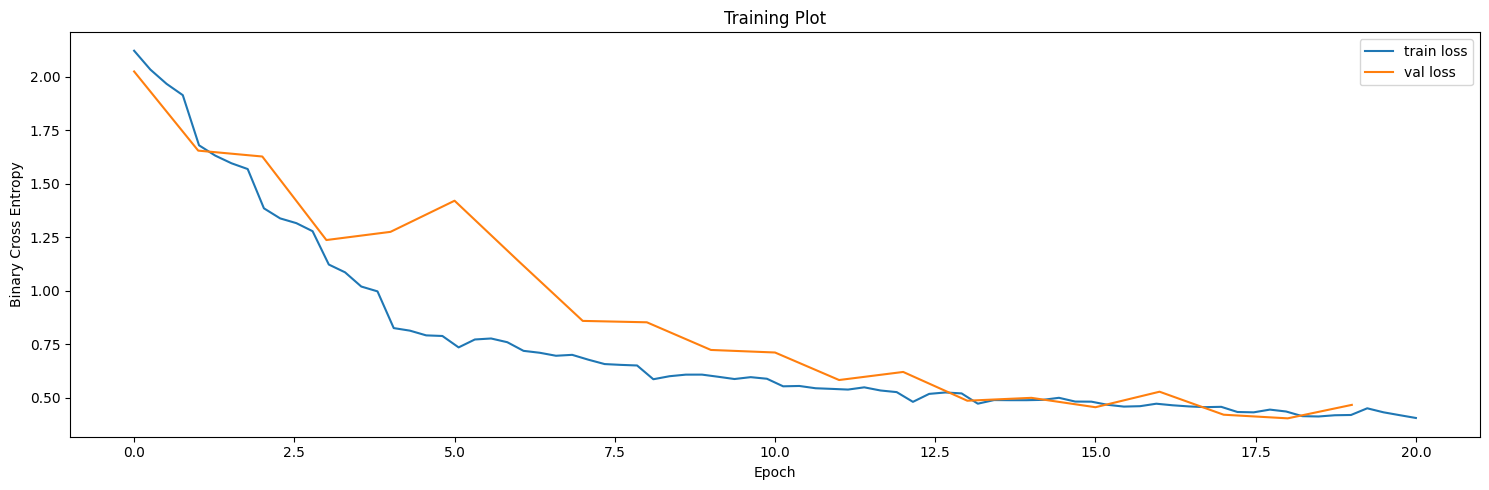

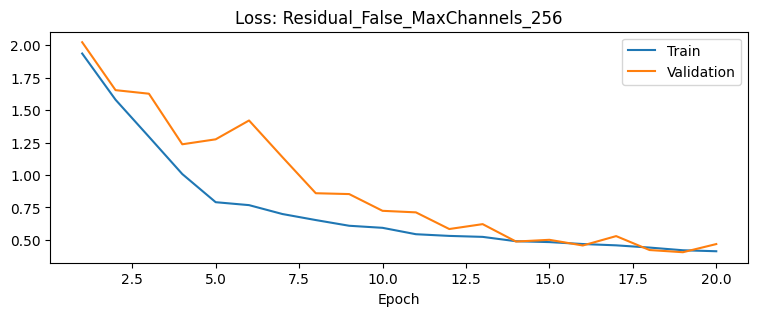

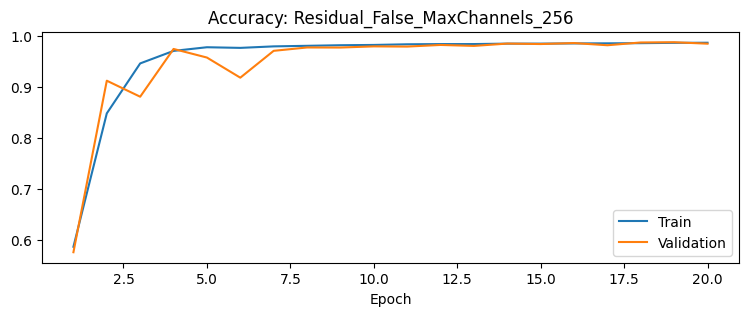

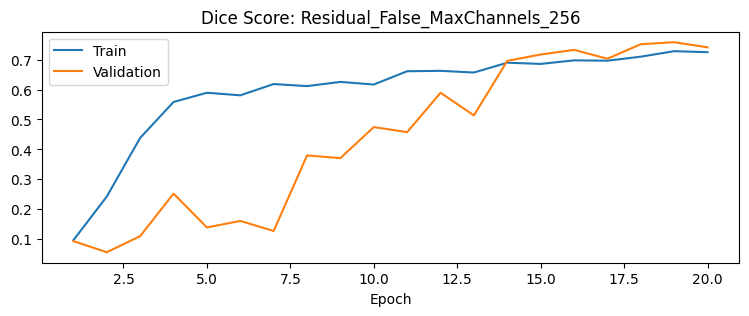

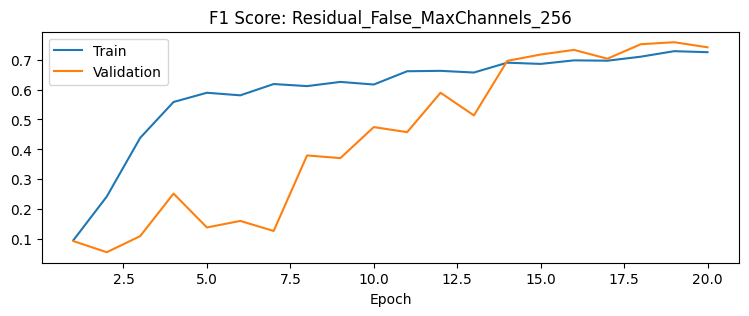

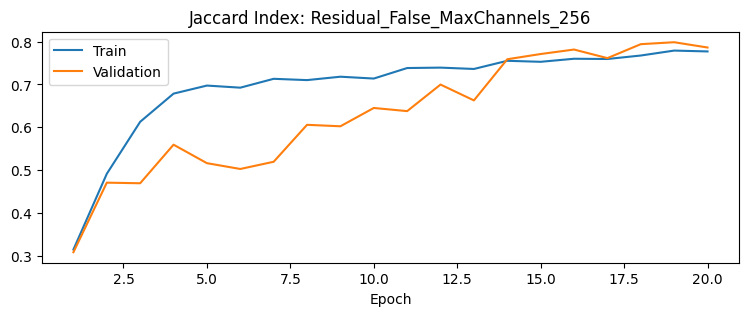

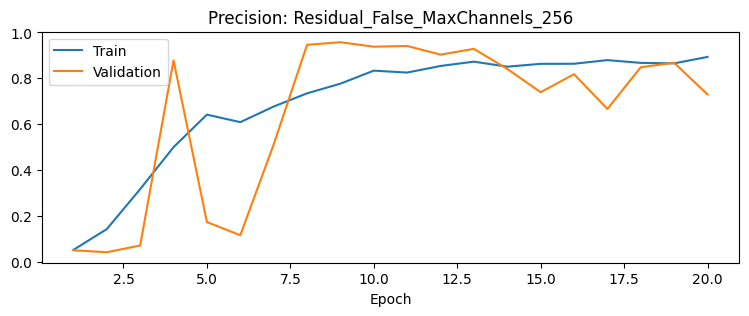

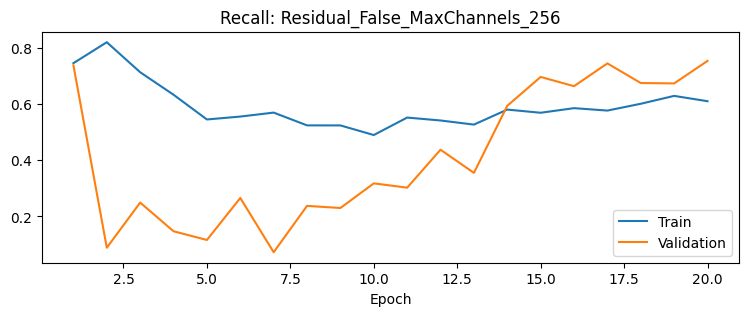

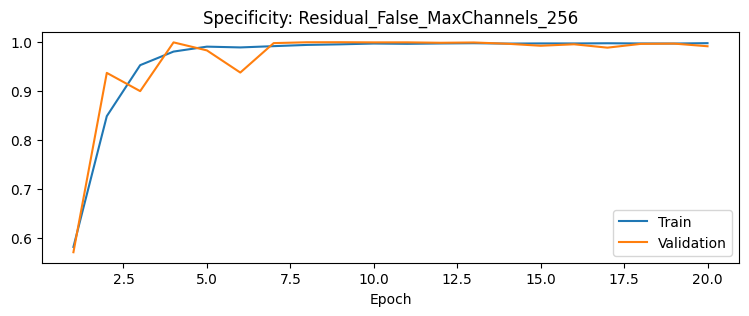

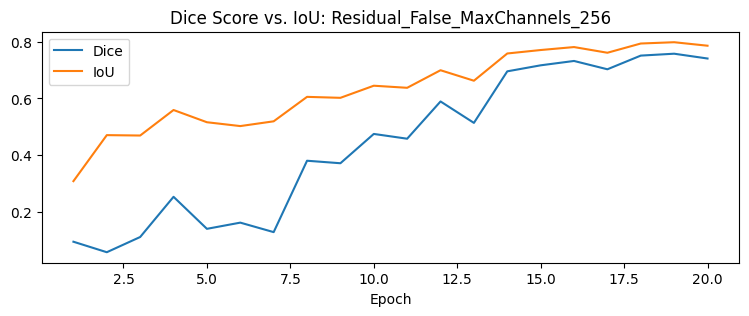

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.73s/it, Acc=0.5928, Dice=0.0563, IoU=0.3084, Loss=2.0029]


Training   - Accuracy: 0.7531 | Dice: 0.1449 | IoU: 0.4130 | Loss: 1.6576
Validation - Accuracy: 0.5540 | Dice: 0.0706 | IoU: 0.2914 | Loss: 2.0459

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9644, Dice=0.1886, IoU=0.5342, Loss=1.4682]


Training   - Accuracy: 0.9106 | Dice: 0.3291 | IoU: 0.5528 | Loss: 1.3788
Validation - Accuracy: 0.9204 | Dice: 0.2058 | IoU: 0.5171 | Loss: 1.4752

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9710, Dice=0.2444, IoU=0.5550, Loss=1.4542]


Training   - Accuracy: 0.9482 | Dice: 0.4344 | IoU: 0.6123 | Loss: 1.1862
Validation - Accuracy: 0.9659 | Dice: 0.3418 | IoU: 0.5858 | Loss: 1.4154

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.81s/it, Acc=0.9823, Dice=0.3086, IoU=0.5823, Loss=1.0423]


Training   - Accuracy: 0.9707 | Dice: 0.5557 | IoU: 0.6774 | Loss: 0.9709
Validation - Accuracy: 0.9755 | Dice: 0.3602 | IoU: 0.5975 | Loss: 1.0095

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9822, Dice=0.3018, IoU=0.5799, Loss=1.0014]


Training   - Accuracy: 0.9769 | Dice: 0.5955 | IoU: 0.7002 | Loss: 0.8102
Validation - Accuracy: 0.9750 | Dice: 0.3258 | IoU: 0.5848 | Loss: 0.9827

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9819, Dice=0.2777, IoU=0.5716, Loss=0.9432]


Training   - Accuracy: 0.9794 | Dice: 0.6040 | IoU: 0.7058 | Loss: 0.6853
Validation - Accuracy: 0.9751 | Dice: 0.2946 | IoU: 0.5739 | Loss: 0.9232

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9821, Dice=0.2962, IoU=0.5779, Loss=0.8628]


Training   - Accuracy: 0.9801 | Dice: 0.5755 | IoU: 0.6919 | Loss: 0.6320
Validation - Accuracy: 0.9761 | Dice: 0.3509 | IoU: 0.5944 | Loss: 0.8199

Epoch 8/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9825, Dice=0.3336, IoU=0.5913, Loss=0.7595]


Training   - Accuracy: 0.9805 | Dice: 0.5845 | IoU: 0.6966 | Loss: 0.5827
Validation - Accuracy: 0.9786 | Dice: 0.4802 | IoU: 0.6472 | Loss: 0.6770

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9824, Dice=0.3241, IoU=0.5879, Loss=0.7281]


Training   - Accuracy: 0.9809 | Dice: 0.5902 | IoU: 0.6996 | Loss: 0.5501
Validation - Accuracy: 0.9791 | Dice: 0.4952 | IoU: 0.6540 | Loss: 0.6325

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9825, Dice=0.3367, IoU=0.5925, Loss=0.6989]


Training   - Accuracy: 0.9811 | Dice: 0.5870 | IoU: 0.6981 | Loss: 0.5317
Validation - Accuracy: 0.9800 | Dice: 0.5327 | IoU: 0.6714 | Loss: 0.5930

Epoch 11/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9825, Dice=0.3224, IoU=0.5873, Loss=0.6778]


Training   - Accuracy: 0.9818 | Dice: 0.6108 | IoU: 0.7106 | Loss: 0.5031
Validation - Accuracy: 0.9811 | Dice: 0.5646 | IoU: 0.6871 | Loss: 0.5505

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9826, Dice=0.3510, IoU=0.5977, Loss=0.6443]


Training   - Accuracy: 0.9823 | Dice: 0.6232 | IoU: 0.7174 | Loss: 0.4779
Validation - Accuracy: 0.9824 | Dice: 0.6441 | IoU: 0.7286 | Loss: 0.5037

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9826, Dice=0.3384, IoU=0.5931, Loss=0.6412]


Training   - Accuracy: 0.9827 | Dice: 0.6446 | IoU: 0.7290 | Loss: 0.4601
Validation - Accuracy: 0.9824 | Dice: 0.6095 | IoU: 0.7103 | Loss: 0.4981

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9826, Dice=0.3439, IoU=0.5951, Loss=0.6180]


Training   - Accuracy: 0.9837 | Dice: 0.6645 | IoU: 0.7405 | Loss: 0.4328
Validation - Accuracy: 0.9836 | Dice: 0.6548 | IoU: 0.7351 | Loss: 0.4639

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.81s/it, Acc=0.9826, Dice=0.3395, IoU=0.5935, Loss=0.5963]


Training   - Accuracy: 0.9842 | Dice: 0.6721 | IoU: 0.7451 | Loss: 0.4155
Validation - Accuracy: 0.9845 | Dice: 0.6813 | IoU: 0.7504 | Loss: 0.4295

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.81s/it, Acc=0.9821, Dice=0.2877, IoU=0.5750, Loss=0.6452]


Training   - Accuracy: 0.9851 | Dice: 0.7021 | IoU: 0.7629 | Loss: 0.3958
Validation - Accuracy: 0.9822 | Dice: 0.5871 | IoU: 0.6987 | Loss: 0.4886

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.93s/it, Acc=0.9826, Dice=0.3408, IoU=0.5939, Loss=0.5643]


Training   - Accuracy: 0.9859 | Dice: 0.7175 | IoU: 0.7725 | Loss: 0.3699
Validation - Accuracy: 0.9866 | Dice: 0.7415 | IoU: 0.7878 | Loss: 0.3756

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9825, Dice=0.3489, IoU=0.5969, Loss=0.5656]


Training   - Accuracy: 0.9868 | Dice: 0.7463 | IoU: 0.7909 | Loss: 0.3489
Validation - Accuracy: 0.9860 | Dice: 0.7437 | IoU: 0.7889 | Loss: 0.3880

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9825, Dice=0.3365, IoU=0.5923, Loss=0.4813]


Training   - Accuracy: 0.9866 | Dice: 0.7464 | IoU: 0.7909 | Loss: 0.3462
Validation - Accuracy: 0.9864 | Dice: 0.7318 | IoU: 0.7816 | Loss: 0.3580

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9809, Dice=0.1944, IoU=0.5442, Loss=0.5623]


Training   - Accuracy: 0.9876 | Dice: 0.7660 | IoU: 0.8041 | Loss: 0.3161
Validation - Accuracy: 0.9836 | Dice: 0.6401 | IoU: 0.7271 | Loss: 0.4344



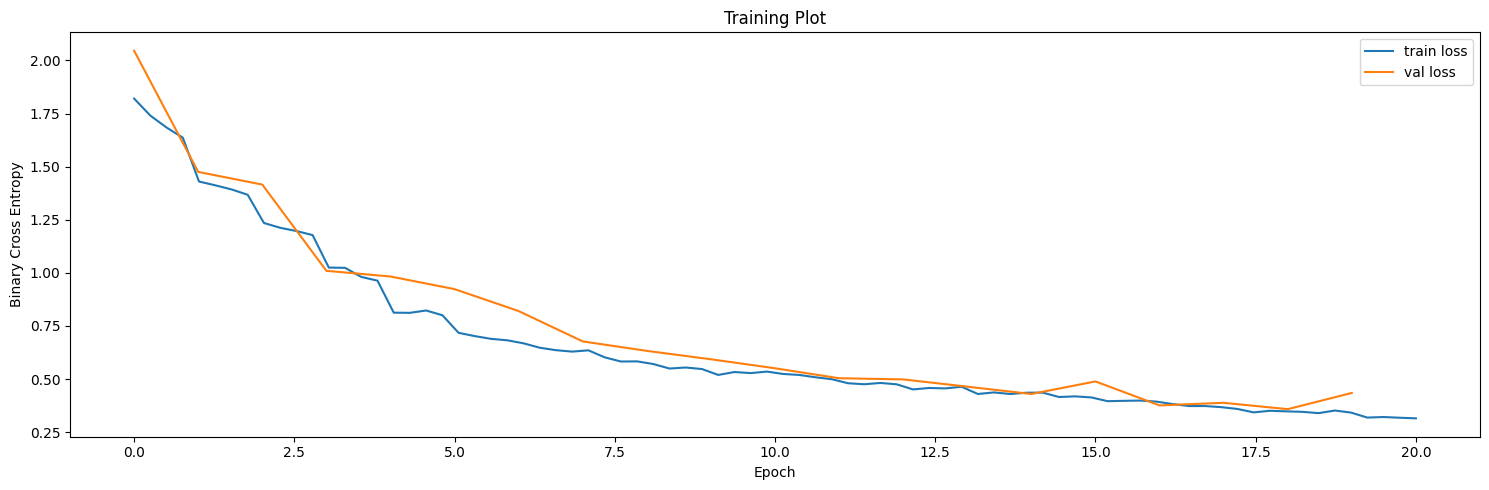

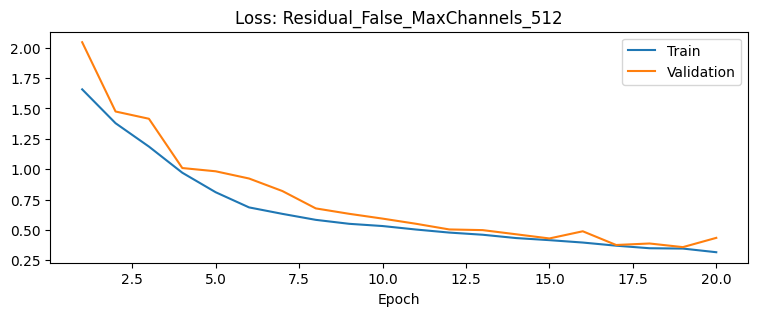

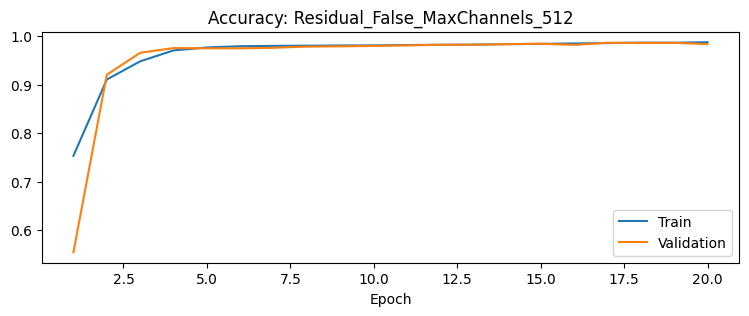

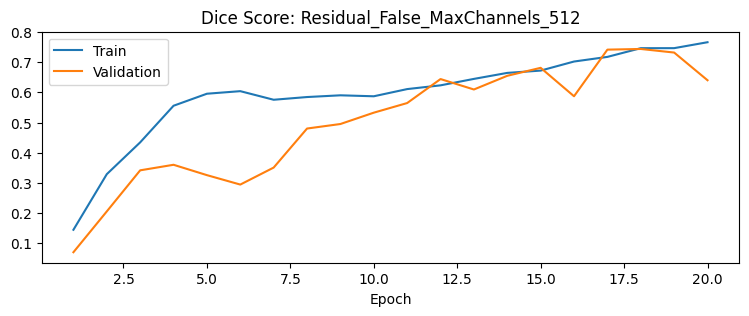

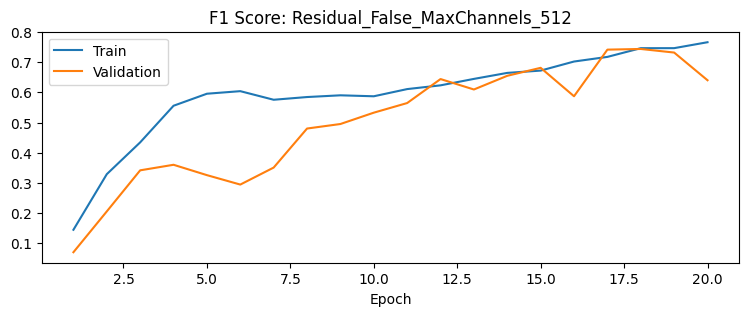

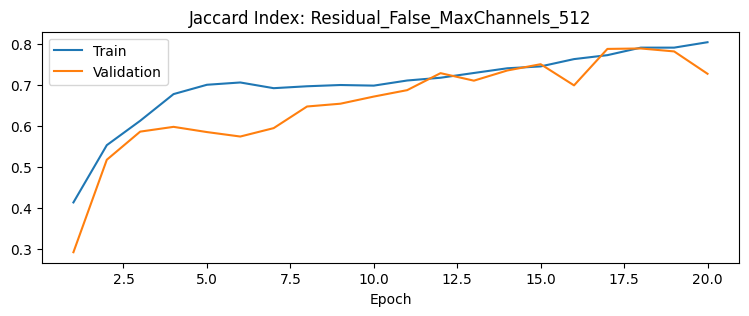

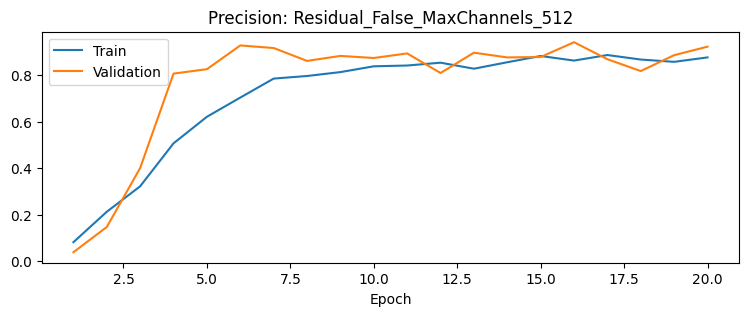

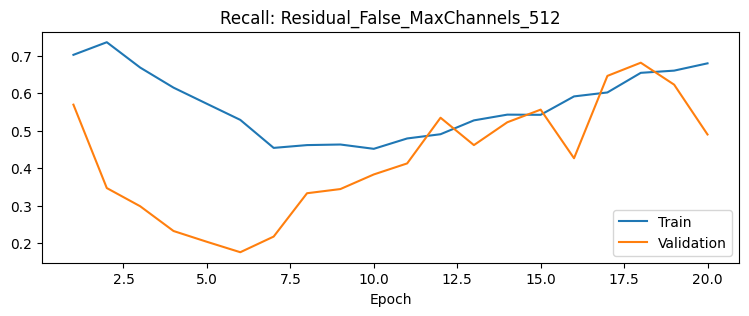

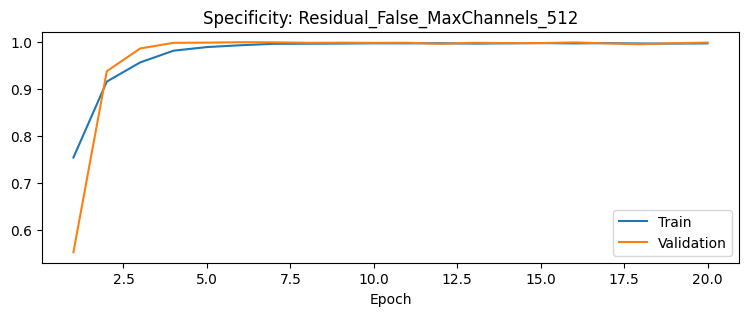

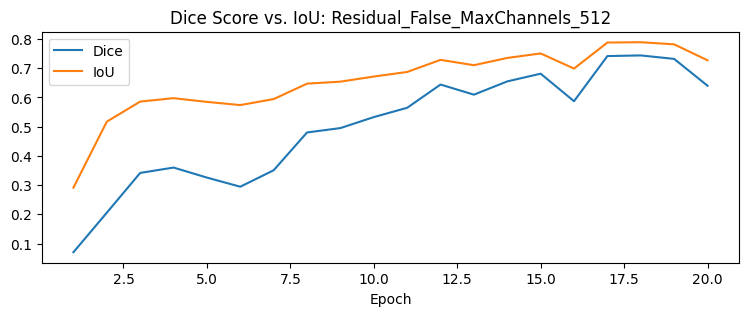

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9782, Dice=0.0006, IoU=0.4892, Loss=1.5289]


Training   - Accuracy: 0.7018 | Dice: 0.1238 | IoU: 0.3807 | Loss: 1.7721
Validation - Accuracy: 0.9693 | Dice: 0.0176 | IoU: 0.4891 | Loss: 1.5122

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9737, Dice=0.0373, IoU=0.4963, Loss=1.5169]


Training   - Accuracy: 0.9208 | Dice: 0.2915 | IoU: 0.5451 | Loss: 1.2355
Validation - Accuracy: 0.9596 | Dice: 0.0758 | IoU: 0.4995 | Loss: 1.4984

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it, Acc=0.9757, Dice=0.0110, IoU=0.4906, Loss=1.3867]

Training   - Accuracy: 0.9711 | Dice: 0.4759 | IoU: 0.6415 | Loss: 0.8738
Validation - Accuracy: 0.9653 | Dice: 0.0091 | IoU: 0.4849 | Loss: 1.3762

Epoch 4/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9784, Dice=0.0009, IoU=0.4894, Loss=1.3128]


Training   - Accuracy: 0.9769 | Dice: 0.4880 | IoU: 0.6497 | Loss: 0.6812
Validation - Accuracy: 0.9699 | Dice: 0.0012 | IoU: 0.4853 | Loss: 1.3216

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it, Acc=0.9786, Dice=0.0027, IoU=0.4900, Loss=1.2141]


Training   - Accuracy: 0.9780 | Dice: 0.4955 | IoU: 0.6535 | Loss: 0.6172
Validation - Accuracy: 0.9703 | Dice: 0.0027 | IoU: 0.4858 | Loss: 1.2245

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.86s/it, Acc=0.9787, Dice=0.0096, IoU=0.4917, Loss=1.1013]


Training   - Accuracy: 0.9786 | Dice: 0.5118 | IoU: 0.6611 | Loss: 0.5790
Validation - Accuracy: 0.9705 | Dice: 0.0123 | IoU: 0.4883 | Loss: 1.1103

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.85s/it, Acc=0.9793, Dice=0.0681, IoU=0.5073, Loss=0.9810]

Training   - Accuracy: 0.9788 | Dice: 0.5093 | IoU: 0.6601 | Loss: 0.5603
Validation - Accuracy: 0.9716 | Dice: 0.0867 | IoU: 0.5085 | Loss: 0.9877

Epoch 8/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.85s/it, Acc=0.9811, Dice=0.2086, IoU=0.5487, Loss=0.8517]


Training   - Accuracy: 0.9791 | Dice: 0.5157 | IoU: 0.6631 | Loss: 0.5396
Validation - Accuracy: 0.9738 | Dice: 0.2156 | IoU: 0.5473 | Loss: 0.8401

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.86s/it, Acc=0.9818, Dice=0.2661, IoU=0.5676, Loss=0.7760]


Training   - Accuracy: 0.9797 | Dice: 0.5413 | IoU: 0.6752 | Loss: 0.5115
Validation - Accuracy: 0.9754 | Dice: 0.3064 | IoU: 0.5781 | Loss: 0.7372

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9821, Dice=0.2859, IoU=0.5744, Loss=0.7311]

Training   - Accuracy: 0.9800 | Dice: 0.5415 | IoU: 0.6755 | Loss: 0.5004
Validation - Accuracy: 0.9765 | Dice: 0.3659 | IoU: 0.6002 | Loss: 0.6718

Epoch 11/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.88s/it, Acc=0.9823, Dice=0.3111, IoU=0.5832, Loss=0.6546]

Training   - Accuracy: 0.9806 | Dice: 0.5633 | IoU: 0.6862 | Loss: 0.4766
Validation - Accuracy: 0.9786 | Dice: 0.4764 | IoU: 0.6455 | Loss: 0.5514

Epoch 12/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9824, Dice=0.3181, IoU=0.5857, Loss=0.6246]


Training   - Accuracy: 0.9815 | Dice: 0.5962 | IoU: 0.7029 | Loss: 0.4461
Validation - Accuracy: 0.9800 | Dice: 0.5322 | IoU: 0.6712 | Loss: 0.5060

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9825, Dice=0.3253, IoU=0.5883, Loss=0.5913]


Training   - Accuracy: 0.9823 | Dice: 0.6181 | IoU: 0.7146 | Loss: 0.4232
Validation - Accuracy: 0.9817 | Dice: 0.5893 | IoU: 0.6996 | Loss: 0.4520

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.83s/it, Acc=0.9826, Dice=0.3448, IoU=0.5954, Loss=0.5609]


Training   - Accuracy: 0.9832 | Dice: 0.6452 | IoU: 0.7296 | Loss: 0.3943
Validation - Accuracy: 0.9830 | Dice: 0.6447 | IoU: 0.7292 | Loss: 0.4109

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9826, Dice=0.3514, IoU=0.5979, Loss=0.5473]

Training   - Accuracy: 0.9838 | Dice: 0.6579 | IoU: 0.7369 | Loss: 0.3806
Validation - Accuracy: 0.9835 | Dice: 0.6907 | IoU: 0.7553 | Loss: 0.3930

Epoch 16/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9826, Dice=0.3574, IoU=0.6001, Loss=0.5479]


Training   - Accuracy: 0.9846 | Dice: 0.6829 | IoU: 0.7514 | Loss: 0.3590
Validation - Accuracy: 0.9829 | Dice: 0.7019 | IoU: 0.7616 | Loss: 0.3977

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9827, Dice=0.3516, IoU=0.5980, Loss=0.5281]


Training   - Accuracy: 0.9849 | Dice: 0.6952 | IoU: 0.7587 | Loss: 0.3477
Validation - Accuracy: 0.9847 | Dice: 0.7188 | IoU: 0.7727 | Loss: 0.3612

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9826, Dice=0.3578, IoU=0.6002, Loss=0.5402]

Training   - Accuracy: 0.9850 | Dice: 0.6965 | IoU: 0.7595 | Loss: 0.3471
Validation - Accuracy: 0.9828 | Dice: 0.7159 | IoU: 0.7700 | Loss: 0.3902

Epoch 19/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9827, Dice=0.3587, IoU=0.6006, Loss=0.5439]

Training   - Accuracy: 0.9853 | Dice: 0.7125 | IoU: 0.7693 | Loss: 0.3305
Validation - Accuracy: 0.9822 | Dice: 0.7106 | IoU: 0.7664 | Loss: 0.4306

Epoch 20/20



Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9828, Dice=0.3357, IoU=0.5922, Loss=0.4849]


Training   - Accuracy: 0.9859 | Dice: 0.7251 | IoU: 0.7772 | Loss: 0.3201
Validation - Accuracy: 0.9838 | Dice: 0.6447 | IoU: 0.7296 | Loss: 0.3796



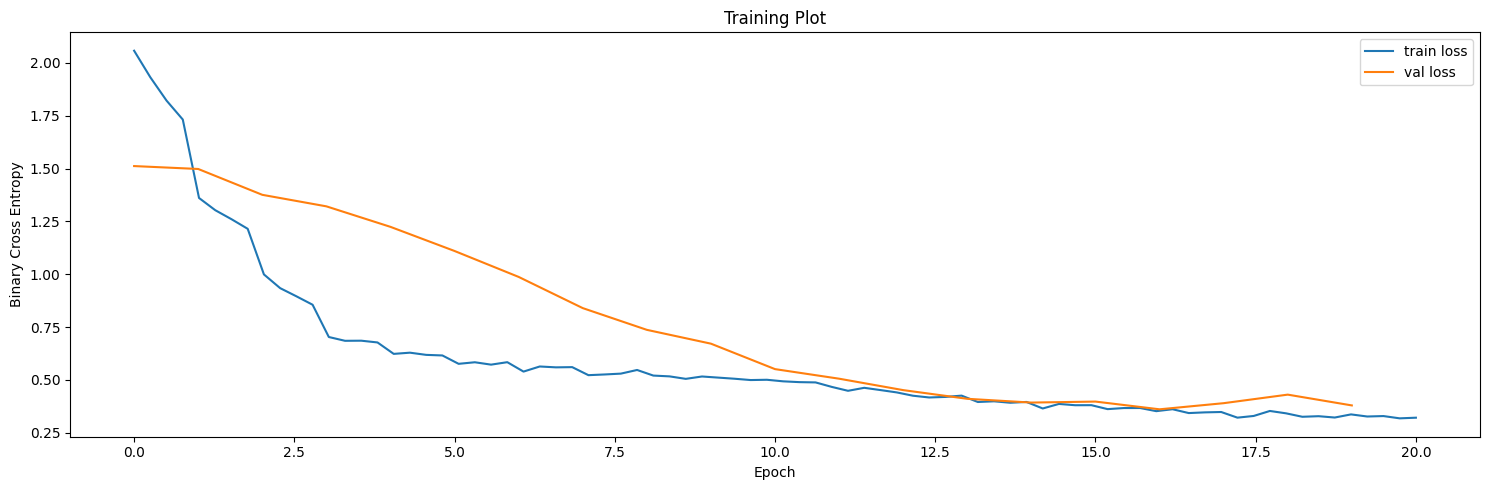

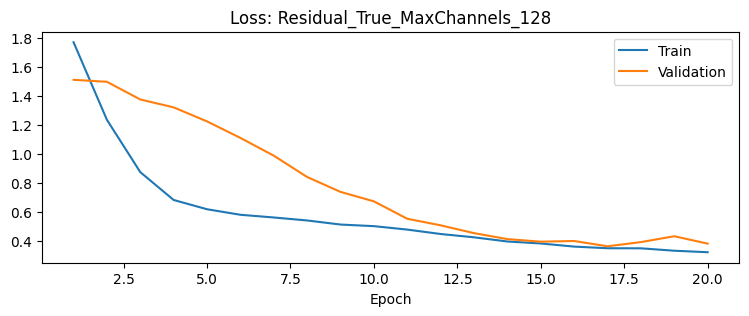

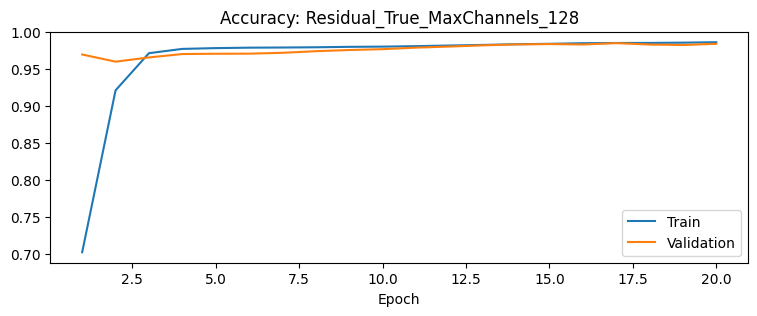

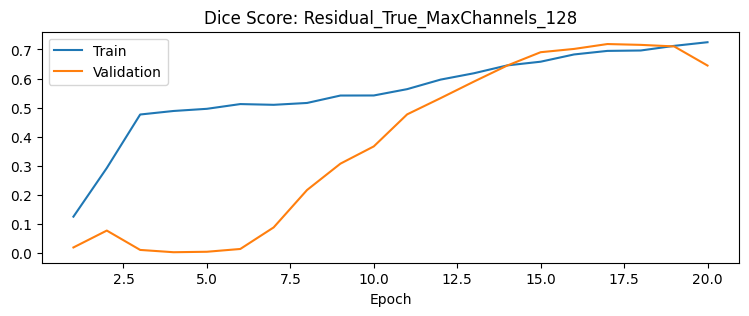

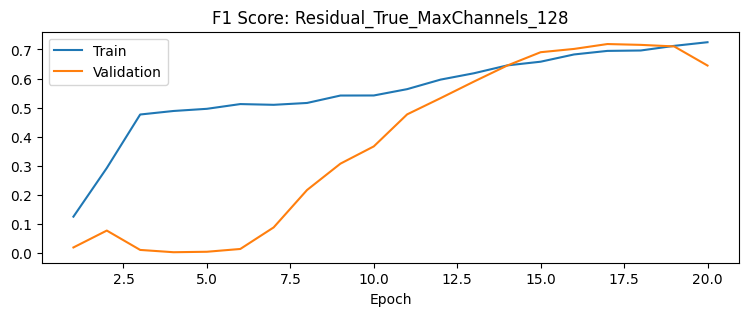

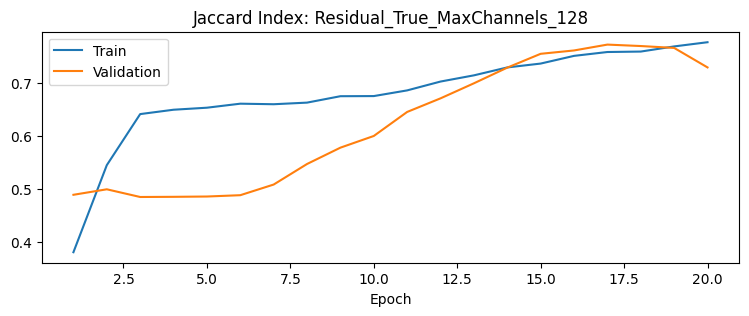

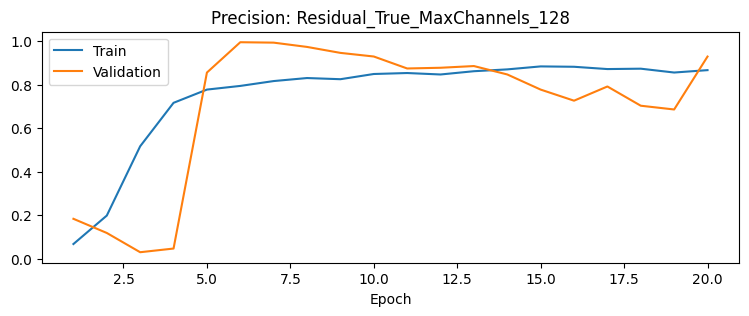

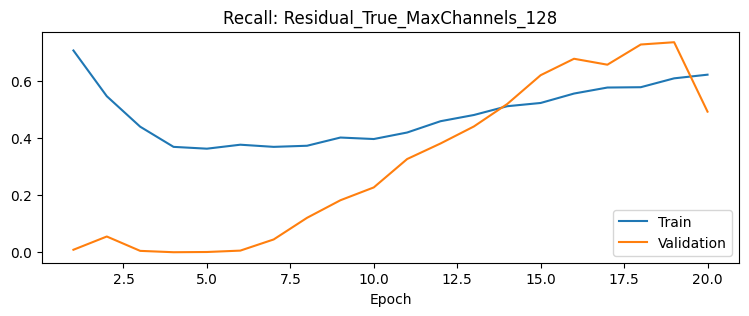

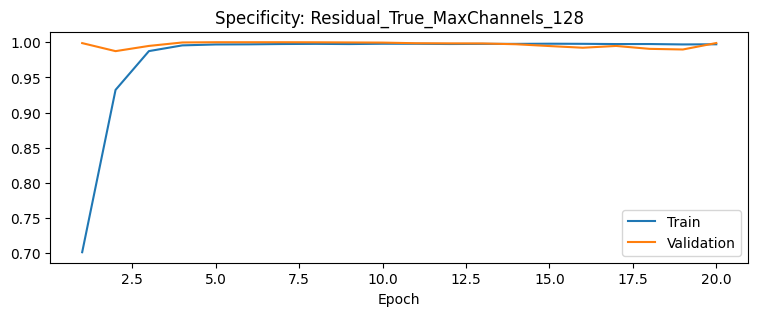

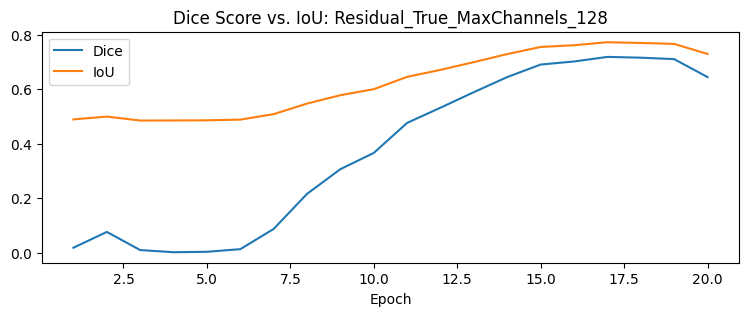

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.8301, Dice=0.0898, IoU=0.4379, Loss=1.8096]


Training   - Accuracy: 0.7129 | Dice: 0.1049 | IoU: 0.3817 | Loss: 1.7444
Validation - Accuracy: 0.7137 | Dice: 0.1359 | IoU: 0.3900 | Loss: 1.8377

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9781, Dice=0.2739, IoU=0.5684, Loss=1.4033]


Training   - Accuracy: 0.9518 | Dice: 0.4110 | IoU: 0.6048 | Loss: 1.1533
Validation - Accuracy: 0.9507 | Dice: 0.3917 | IoU: 0.5968 | Loss: 1.4004

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9808, Dice=0.2656, IoU=0.5669, Loss=1.1364]


Training   - Accuracy: 0.9763 | Dice: 0.5553 | IoU: 0.6801 | Loss: 0.7991
Validation - Accuracy: 0.9701 | Dice: 0.3516 | IoU: 0.5916 | Loss: 1.1187

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9809, Dice=0.2190, IoU=0.5519, Loss=1.0008]


Training   - Accuracy: 0.9792 | Dice: 0.5457 | IoU: 0.6771 | Loss: 0.6365
Validation - Accuracy: 0.9731 | Dice: 0.2466 | IoU: 0.5568 | Loss: 0.9882

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9817, Dice=0.2756, IoU=0.5708, Loss=0.8490]


Training   - Accuracy: 0.9801 | Dice: 0.5676 | IoU: 0.6880 | Loss: 0.5591
Validation - Accuracy: 0.9762 | Dice: 0.3631 | IoU: 0.5989 | Loss: 0.7747

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9823, Dice=0.3437, IoU=0.5949, Loss=0.7345]


Training   - Accuracy: 0.9819 | Dice: 0.6245 | IoU: 0.7179 | Loss: 0.4840
Validation - Accuracy: 0.9800 | Dice: 0.5506 | IoU: 0.6798 | Loss: 0.6351

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9822, Dice=0.3390, IoU=0.5931, Loss=0.6836]


Training   - Accuracy: 0.9835 | Dice: 0.6697 | IoU: 0.7434 | Loss: 0.4345
Validation - Accuracy: 0.9808 | Dice: 0.5605 | IoU: 0.6849 | Loss: 0.5601

Epoch 8/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9825, Dice=0.3396, IoU=0.5934, Loss=0.6219]


Training   - Accuracy: 0.9842 | Dice: 0.6812 | IoU: 0.7502 | Loss: 0.4077
Validation - Accuracy: 0.9825 | Dice: 0.6170 | IoU: 0.7142 | Loss: 0.4803

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9797, Dice=0.0995, IoU=0.5160, Loss=0.7457]


Training   - Accuracy: 0.9850 | Dice: 0.7000 | IoU: 0.7616 | Loss: 0.3789
Validation - Accuracy: 0.9781 | Dice: 0.4273 | IoU: 0.6248 | Loss: 0.5927

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9824, Dice=0.3125, IoU=0.5837, Loss=0.5772]


Training   - Accuracy: 0.9855 | Dice: 0.7101 | IoU: 0.7679 | Loss: 0.3592
Validation - Accuracy: 0.9837 | Dice: 0.6437 | IoU: 0.7290 | Loss: 0.4129

Epoch 11/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9826, Dice=0.3329, IoU=0.5911, Loss=0.5336]


Training   - Accuracy: 0.9867 | Dice: 0.7421 | IoU: 0.7882 | Loss: 0.3212
Validation - Accuracy: 0.9859 | Dice: 0.7231 | IoU: 0.7760 | Loss: 0.3519

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9797, Dice=0.1017, IoU=0.5166, Loss=0.7526]


Training   - Accuracy: 0.9873 | Dice: 0.7562 | IoU: 0.7975 | Loss: 0.3013
Validation - Accuracy: 0.9763 | Dice: 0.3424 | IoU: 0.5914 | Loss: 0.6560

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9805, Dice=0.1606, IoU=0.5339, Loss=0.6866]


Training   - Accuracy: 0.9876 | Dice: 0.7625 | IoU: 0.8017 | Loss: 0.2972
Validation - Accuracy: 0.9800 | Dice: 0.5045 | IoU: 0.6586 | Loss: 0.5151

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9829, Dice=0.3921, IoU=0.6133, Loss=0.4744]


Training   - Accuracy: 0.9873 | Dice: 0.7554 | IoU: 0.7970 | Loss: 0.3004
Validation - Accuracy: 0.9848 | Dice: 0.7588 | IoU: 0.7979 | Loss: 0.3536

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9815, Dice=0.2378, IoU=0.5582, Loss=0.6052]


Training   - Accuracy: 0.9884 | Dice: 0.7893 | IoU: 0.8200 | Loss: 0.2683
Validation - Accuracy: 0.9820 | Dice: 0.5733 | IoU: 0.6918 | Loss: 0.4491

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9862, Dice=0.5336, IoU=0.6750, Loss=0.3493]


Training   - Accuracy: 0.9888 | Dice: 0.7919 | IoU: 0.8221 | Loss: 0.2559
Validation - Accuracy: 0.9873 | Dice: 0.7441 | IoU: 0.7898 | Loss: 0.2860

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9848, Dice=0.4554, IoU=0.6398, Loss=0.4490]


Training   - Accuracy: 0.9897 | Dice: 0.8089 | IoU: 0.8343 | Loss: 0.2328
Validation - Accuracy: 0.9831 | Dice: 0.6091 | IoU: 0.7104 | Loss: 0.3962

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9875, Dice=0.6004, IoU=0.7082, Loss=0.3939]


Training   - Accuracy: 0.9906 | Dice: 0.8299 | IoU: 0.8498 | Loss: 0.2163
Validation - Accuracy: 0.9830 | Dice: 0.6061 | IoU: 0.7088 | Loss: 0.3938

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9896, Dice=0.6952, IoU=0.7612, Loss=0.2812]


Training   - Accuracy: 0.9908 | Dice: 0.8334 | IoU: 0.8525 | Loss: 0.2099
Validation - Accuracy: 0.9881 | Dice: 0.7610 | IoU: 0.8011 | Loss: 0.2592

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9859, Dice=0.5147, IoU=0.6662, Loss=0.3842]


Training   - Accuracy: 0.9914 | Dice: 0.8488 | IoU: 0.8643 | Loss: 0.1984
Validation - Accuracy: 0.9871 | Dice: 0.7332 | IoU: 0.7828 | Loss: 0.2952



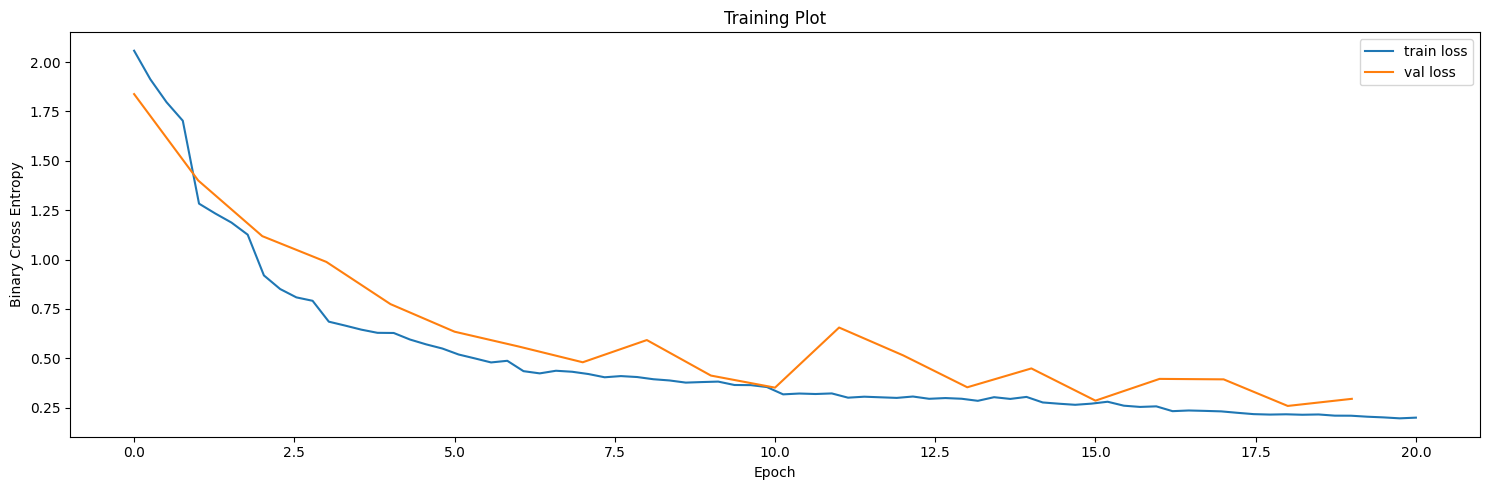

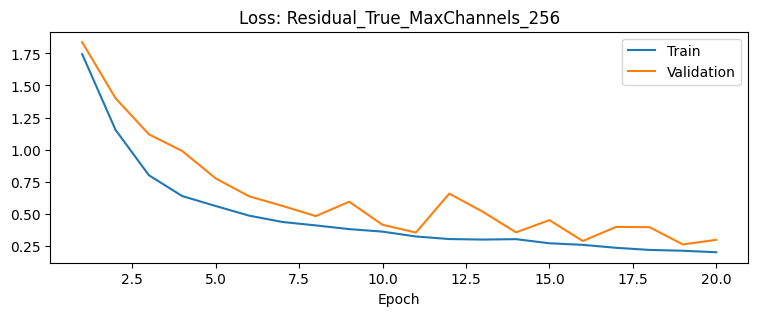

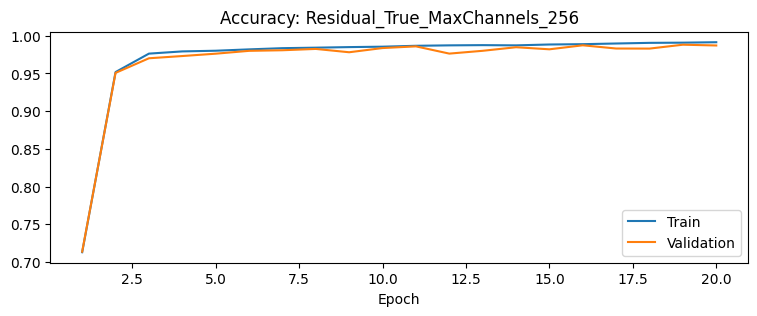

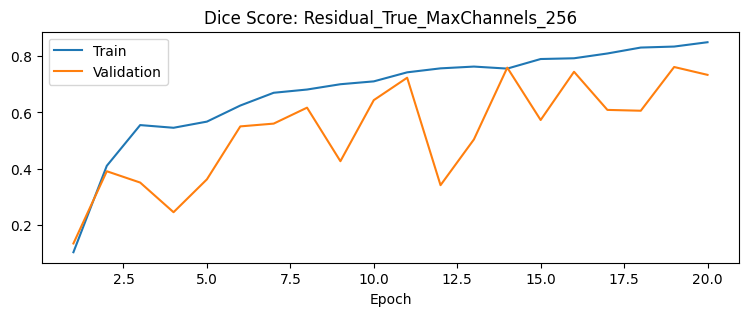

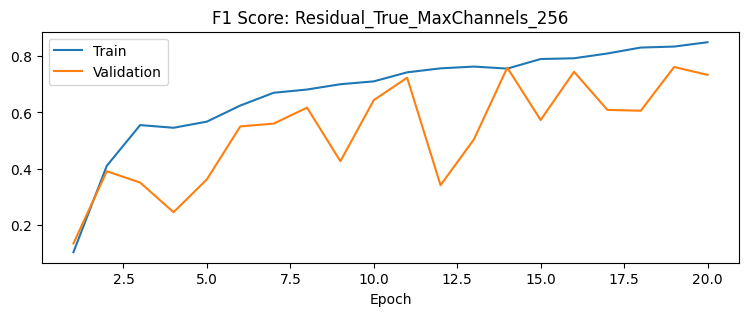

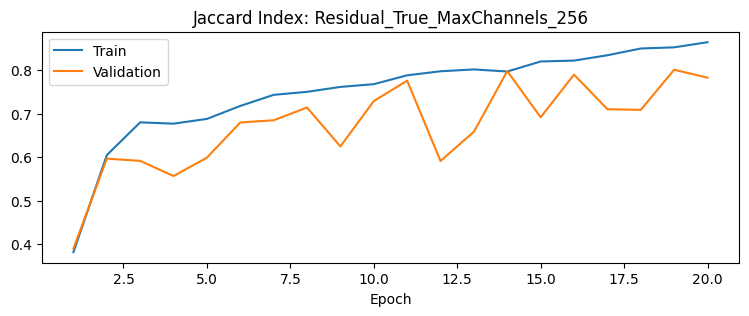

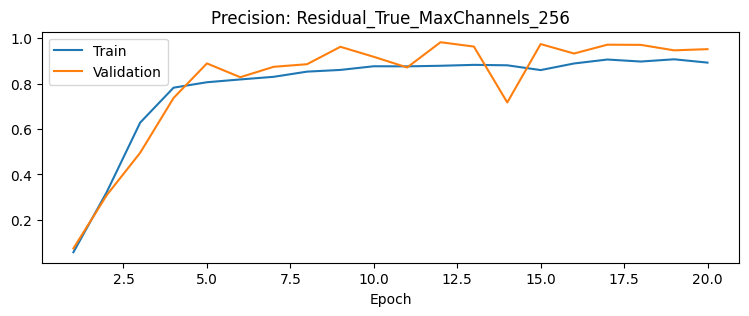

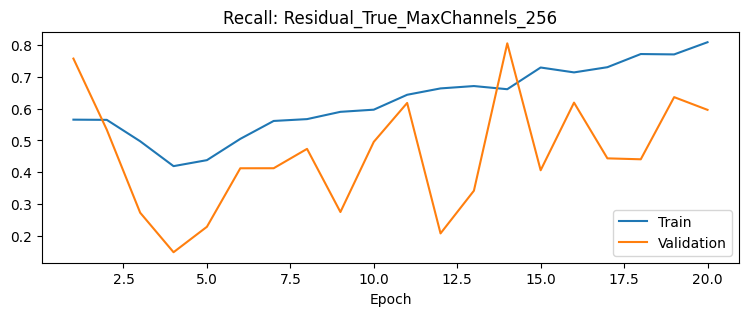

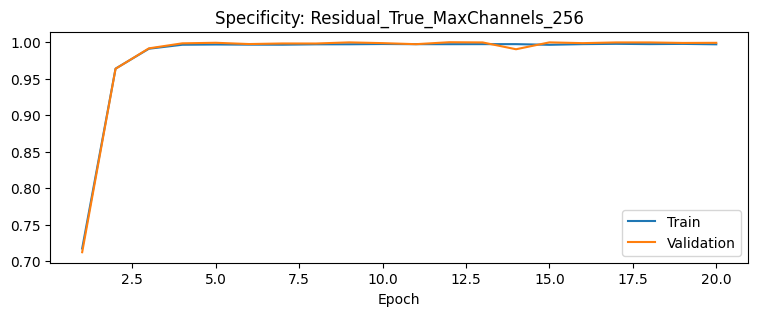

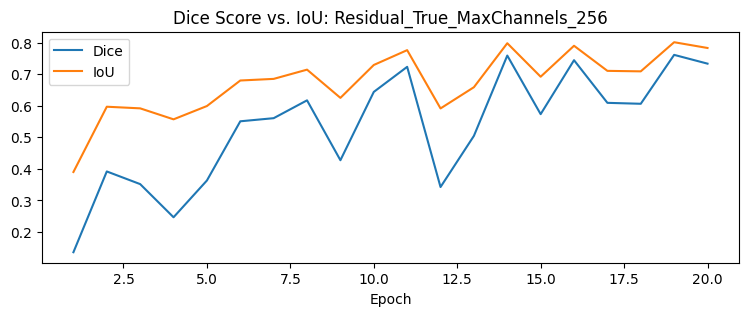

Epoch 1/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.8399, Dice=0.0463, IoU=0.4315, Loss=1.6640]


Training   - Accuracy: 0.7910 | Dice: 0.1425 | IoU: 0.4320 | Loss: 1.7395
Validation - Accuracy: 0.8096 | Dice: 0.0584 | IoU: 0.4193 | Loss: 1.6896

Epoch 2/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9664, Dice=0.0938, IoU=0.5077, Loss=1.6100]


Training   - Accuracy: 0.9496 | Dice: 0.3946 | IoU: 0.5973 | Loss: 1.1570
Validation - Accuracy: 0.9127 | Dice: 0.1560 | IoU: 0.4983 | Loss: 1.6155

Epoch 3/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it, Acc=0.9751, Dice=0.1322, IoU=0.5229, Loss=1.3657]


Training   - Accuracy: 0.9739 | Dice: 0.5274 | IoU: 0.6658 | Loss: 0.8238
Validation - Accuracy: 0.9542 | Dice: 0.1936 | IoU: 0.5306 | Loss: 1.3494

Epoch 4/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9786, Dice=0.0015, IoU=0.4897, Loss=1.3274]


Training   - Accuracy: 0.9790 | Dice: 0.5533 | IoU: 0.6806 | Loss: 0.6365
Validation - Accuracy: 0.9703 | Dice: 0.0094 | IoU: 0.4875 | Loss: 1.3198

Epoch 5/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9796, Dice=0.1007, IoU=0.5163, Loss=1.1060]


Training   - Accuracy: 0.9810 | Dice: 0.5786 | IoU: 0.6939 | Loss: 0.5326
Validation - Accuracy: 0.9715 | Dice: 0.0847 | IoU: 0.5079 | Loss: 1.1009

Epoch 6/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9812, Dice=0.2402, IoU=0.5588, Loss=0.8617]


Training   - Accuracy: 0.9835 | Dice: 0.6590 | IoU: 0.7373 | Loss: 0.4374
Validation - Accuracy: 0.9745 | Dice: 0.2639 | IoU: 0.5632 | Loss: 0.8180

Epoch 7/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, Acc=0.9819, Dice=0.2837, IoU=0.5736, Loss=0.7916]


Training   - Accuracy: 0.9854 | Dice: 0.7121 | IoU: 0.7691 | Loss: 0.3751
Validation - Accuracy: 0.9754 | Dice: 0.3034 | IoU: 0.5770 | Loss: 0.7377

Epoch 8/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9802, Dice=0.1362, IoU=0.5266, Loss=0.8817]


Training   - Accuracy: 0.9860 | Dice: 0.7247 | IoU: 0.7770 | Loss: 0.3487
Validation - Accuracy: 0.9740 | Dice: 0.2266 | IoU: 0.5508 | Loss: 0.8209

Epoch 9/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it, Acc=0.9825, Dice=0.3141, IoU=0.5844, Loss=0.6304]


Training   - Accuracy: 0.9874 | Dice: 0.7595 | IoU: 0.7997 | Loss: 0.3132
Validation - Accuracy: 0.9792 | Dice: 0.4718 | IoU: 0.6439 | Loss: 0.5608

Epoch 10/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.75s/it, Acc=0.9849, Dice=0.5402, IoU=0.6774, Loss=0.4487]


Training   - Accuracy: 0.9880 | Dice: 0.7700 | IoU: 0.8069 | Loss: 0.2891
Validation - Accuracy: 0.9862 | Dice: 0.7507 | IoU: 0.7934 | Loss: 0.3552

Epoch 11/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, Acc=0.9851, Dice=0.5666, IoU=0.6902, Loss=0.4028]


Training   - Accuracy: 0.9892 | Dice: 0.8001 | IoU: 0.8278 | Loss: 0.2636
Validation - Accuracy: 0.9874 | Dice: 0.7655 | IoU: 0.8036 | Loss: 0.3146

Epoch 12/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it, Acc=0.9849, Dice=0.5535, IoU=0.6837, Loss=0.4079]


Training   - Accuracy: 0.9891 | Dice: 0.7990 | IoU: 0.8271 | Loss: 0.2569
Validation - Accuracy: 0.9864 | Dice: 0.7379 | IoU: 0.7854 | Loss: 0.3288

Epoch 13/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.87s/it, Acc=0.9896, Dice=0.7372, IoU=0.7866, Loss=0.3223]


Training   - Accuracy: 0.9893 | Dice: 0.8025 | IoU: 0.8296 | Loss: 0.2485
Validation - Accuracy: 0.9878 | Dice: 0.7621 | IoU: 0.8016 | Loss: 0.2899

Epoch 14/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.92s/it, Acc=0.9889, Dice=0.6743, IoU=0.7487, Loss=0.2955]


Training   - Accuracy: 0.9901 | Dice: 0.8168 | IoU: 0.8401 | Loss: 0.2283
Validation - Accuracy: 0.9870 | Dice: 0.7415 | IoU: 0.7880 | Loss: 0.2996

Epoch 15/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.89s/it, Acc=0.9897, Dice=0.7040, IoU=0.7664, Loss=0.2583]


Training   - Accuracy: 0.9909 | Dice: 0.8359 | IoU: 0.8544 | Loss: 0.2117
Validation - Accuracy: 0.9890 | Dice: 0.7845 | IoU: 0.8171 | Loss: 0.2462

Epoch 16/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.92s/it, Acc=0.9877, Dice=0.6342, IoU=0.7259, Loss=0.2891]


Training   - Accuracy: 0.9911 | Dice: 0.8380 | IoU: 0.8560 | Loss: 0.2013
Validation - Accuracy: 0.9901 | Dice: 0.8264 | IoU: 0.8470 | Loss: 0.2296

Epoch 17/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.84s/it, Acc=0.9861, Dice=0.5312, IoU=0.6738, Loss=0.3373]


Training   - Accuracy: 0.9916 | Dice: 0.8533 | IoU: 0.8678 | Loss: 0.1957
Validation - Accuracy: 0.9875 | Dice: 0.7410 | IoU: 0.7879 | Loss: 0.2771

Epoch 18/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.84s/it, Acc=0.9927, Dice=0.8121, IoU=0.8381, Loss=0.2085]


Training   - Accuracy: 0.9923 | Dice: 0.8630 | IoU: 0.8756 | Loss: 0.1763
Validation - Accuracy: 0.9907 | Dice: 0.8274 | IoU: 0.8480 | Loss: 0.2076

Epoch 19/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it, Acc=0.9917, Dice=0.7745, IoU=0.8118, Loss=0.2138]


Training   - Accuracy: 0.9924 | Dice: 0.8663 | IoU: 0.8782 | Loss: 0.1741
Validation - Accuracy: 0.9908 | Dice: 0.8285 | IoU: 0.8489 | Loss: 0.2030

Epoch 20/20


Validation: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Acc=0.9923, Dice=0.7942, IoU=0.8254, Loss=0.2046]


Training   - Accuracy: 0.9929 | Dice: 0.8761 | IoU: 0.8861 | Loss: 0.1632
Validation - Accuracy: 0.9911 | Dice: 0.8340 | IoU: 0.8531 | Loss: 0.1941



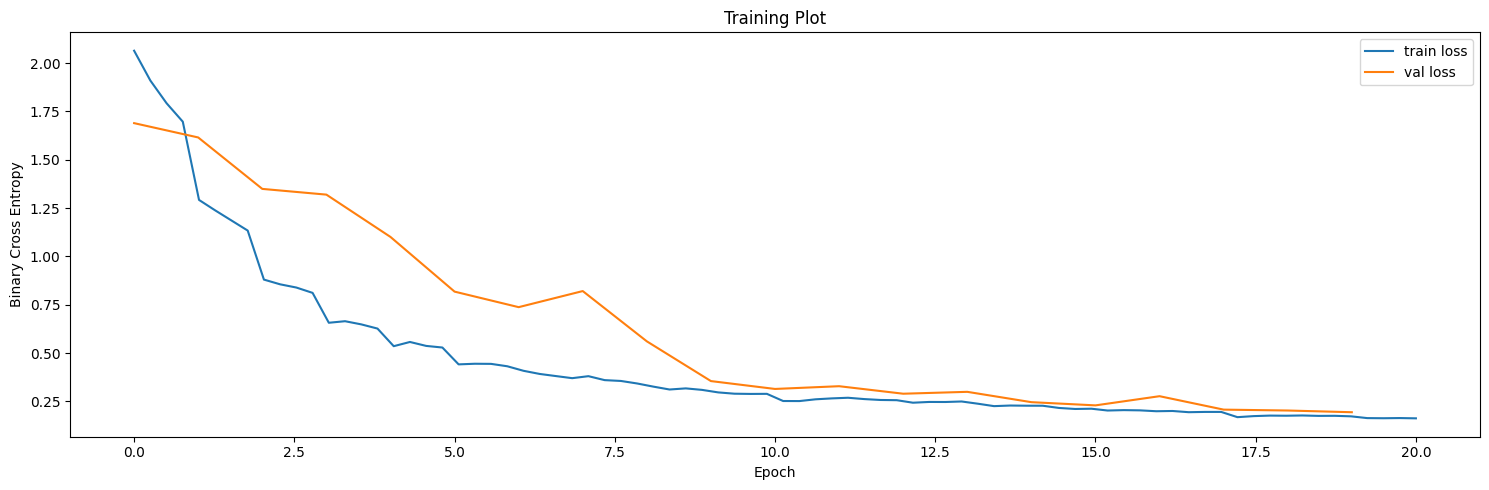

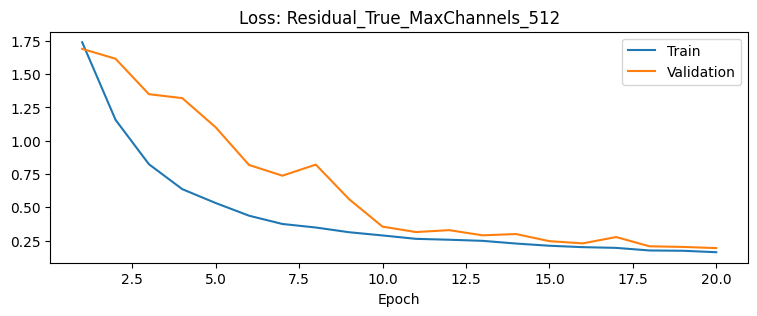

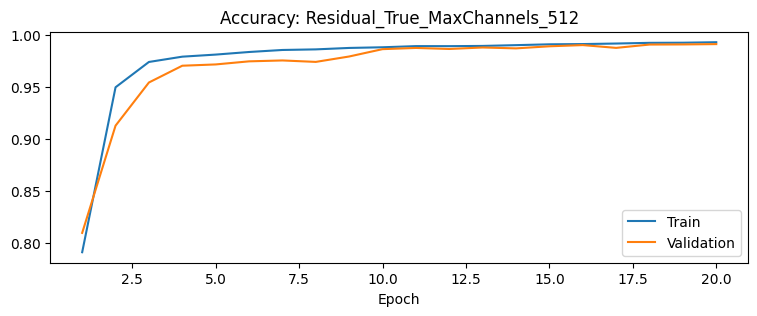

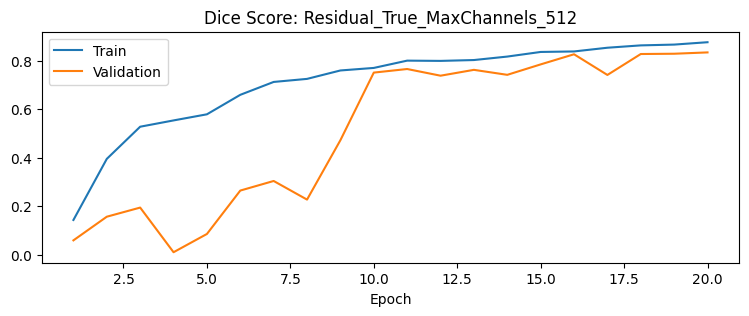

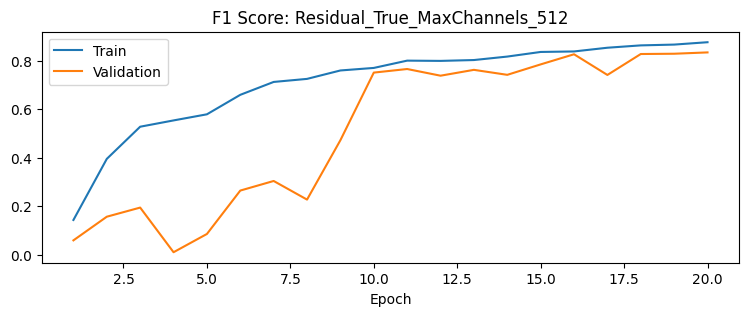

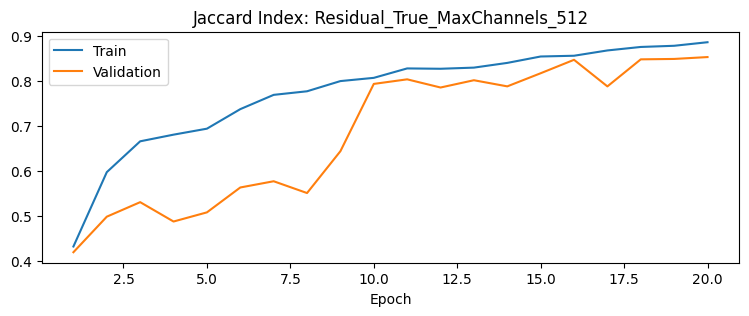

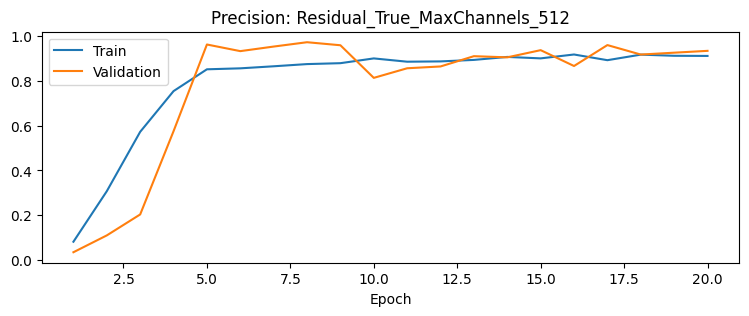

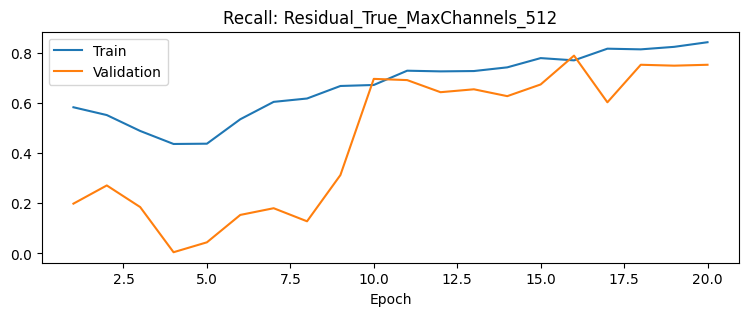

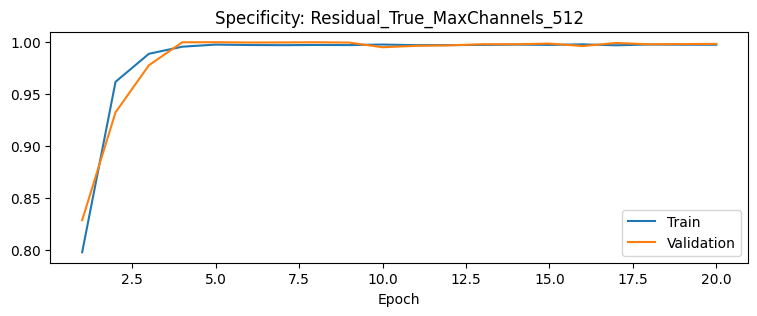

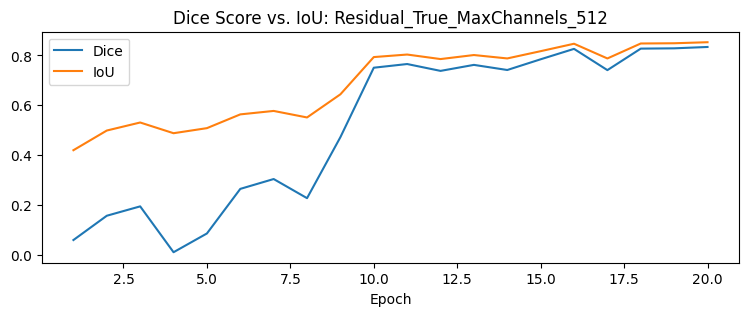

In [4]:
best_model = None
best_dice_score = 0.0
best_train_loss_batch_history = None
best_train_loss_history = None
best_val_loss_history = None
best_train_metrics = None
best_val_metrics = None
best_train_loss = 100
best_val_loss = 100

seed = 42
epochs = 20
channels = (3, 32, 64, 128)
is_residual = True
bias = True
learning_rate = 1e-3
weight_decay = 1e-5
lr_reduce_factor = 0.15
patience = 2
model_name = 'AttentionUNet'

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

channels = [[3, 32, 64, 128], [3, 32, 64, 128, 256], [3, 32, 64, 128, 256, 512]]
residuals = [False, True]

for res in residuals:
    for ch in channels:
        model_path = f'res_{res}_ch_{ch[-1]}'
        model = nn.DataParallel(AttentionUNet(ch, res, bias)).to(device)
        criterion = DiceBCELoss(device).to(device=device)
        optimizer = torch.optim.Adam(model.parameters())
        #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_reduce_factor, patience=patience)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)

        solver = Solver(
            model,
            epochs,
            device,
            train_loader,
            val_loader,
            criterion,
            optimizer,
            scheduler,
            model_name,
            model_path
        )

        solver.fit()
        
        best_train_loss_batch_history = solver.train_loss_batch
        best_train_loss_history = solver.train_loss_history
        best_val_loss_history = solver.val_loss_history
        best_train_metrics = solver.train_metrics
        best_val_metrics = solver.val_metrics
        
        plot_losses(best_train_loss_batch_history, best_val_loss_history)
        train_metrics_acc = best_train_metrics.get_metrics()
        val_metrics_acc = best_val_metrics.get_metrics()
        
        title = f'Residual_{res}_MaxChannels_{ch[-1]}'
        plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history)
        plot_generic(f'Accuracy: {title}', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY])
        plot_generic(f'Dice Score: {title}', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE])
        plot_generic(f'F1 Score: {title}', 'Epoch', 'Train', train_metrics_acc[F1_SCORE], 'Validation', val_metrics_acc[F1_SCORE])
        plot_generic(f'Jaccard Index: {title}', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX])
        plot_generic(f'Precision: {title}', 'Epoch', 'Train', train_metrics_acc[PRECISION], 'Validation', val_metrics_acc[PRECISION])
        plot_generic(f'Recall: {title}', 'Epoch', 'Train', train_metrics_acc[RECALL], 'Validation', val_metrics_acc[RECALL])
        plot_generic(f'Specificity: {title}', 'Epoch', 'Train', train_metrics_acc[SPECIFICITY], 'Validation', val_metrics_acc[SPECIFICITY])
        plot_generic(f'Dice Score vs. IoU: {title}', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX])

        #if solver.best_dice_score > best_dice_score:
            #best_model = solver.best_model
            #best_dice_score = solver.best_dice_score
            #best_train_loss_batch_history = solver.train_loss_batch
            #best_train_loss_history = solver.train_loss_history
            #best_val_loss_history = solver.val_loss_history
            #best_train_metrics = solver.train_metrics
            #best_val_metrics = solver.val_metrics
            #best_train_loss = solver.best_train_loss
            #best_val_loss = solver.best_val_loss
            #torch.save(best_model, f'saved_models/{model_name}/Dice_{best_dice_score:.4f}_lr_{learning_rate}_reg_{weight_decay}_train_loss_{best_train_loss:.4f}_val_loss_{best_val_loss:.4f}_ch_{channels[-1]}.pt')


In [8]:
#plot_losses(best_train_loss_batch_history, best_val_loss_history)

In [6]:
#train_metrics_acc = best_train_metrics.get_metrics()
#val_metrics_acc = best_val_metrics.get_metrics()
#plot_generic('Loss', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history)
#plot_generic('Accuracy', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY])
#plot_generic('Dice Score', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE])
#plot_generic('Jaccard Index', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX])
#plot_generic('Dice Score vs. Jaccard Index', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX])

In [12]:
test_metrics_acc = Metrics(device, 2)
criterion = DiceBCELoss(device).to(device=device)
model_test = '20_TDice_0.8761_VDice_0.8340_TLoss_0.1632_VLoss_0.1941.pt'
test_loss = solver.evaluate(torch.load(f'../saved_models/AttentionUNet/res_True_ch_512/{model_test}'), criterion, device, val_loader, test_metrics_acc)
test_metrics_acc.compute()
test_metrics_acc = test_metrics_acc.get_metrics()
print(f'Acc: {test_metrics_acc[ACCURACY][0].item():.4f}')
print(f'Dice: {test_metrics_acc[DICE_SCORE][0].item():.4f}')
print(f'F1: {test_metrics_acc[F1_SCORE][0].item():.4f}')
print(f'IoU: {test_metrics_acc[JACCARD_INDEX][0].item():.4f}')
print(f'Prec: {test_metrics_acc[PRECISION][0].item():.4f}')
print(f'RECALL: {test_metrics_acc[RECALL][0].item():.4f}')
print(f'SPECIFICITY: {test_metrics_acc[SPECIFICITY][0].item():.4f}')

Validation: 100%|██████████| 2/2 [00:04<00:00,  2.06s/it, Acc=0.9923, Dice=0.7942, IoU=0.8254, Loss=0.2046]


Acc: 0.9911
Dice: 0.8340
F1: 0.8340
IoU: 0.8531
Prec: 0.9343
RECALL: 0.7532
SPECIFICITY: 0.9984


In [13]:
from torchsummary import summary
test = AttentionUNet([3, 32, 64, 128, 256, 512], True, True).to(device)
summary(test, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]           9,248
       BatchNorm2d-5         [-1, 32, 128, 128]              64
            Conv2d-6         [-1, 32, 128, 128]             128
       BatchNorm2d-7         [-1, 32, 128, 128]              64
         ConvBlock-8         [-1, 32, 128, 128]               0
         MaxPool2d-9           [-1, 32, 64, 64]               0
     EncoderLayer-10  [[-1, 32, 128, 128], [-1, 32, 64, 64]]               0
           Conv2d-11           [-1, 64, 64, 64]          18,496
      BatchNorm2d-12           [-1, 64, 64, 64]             128
             ReLU-13           [-1, 64, 64, 64]               0
           Conv2d-14      